In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

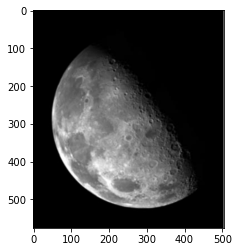

In [45]:
img = cv2.cvtColor( cv2.imread('./moon.png' ), cv2.COLOR_BGR2GRAY)

plt.gray()

plt.imshow(img)

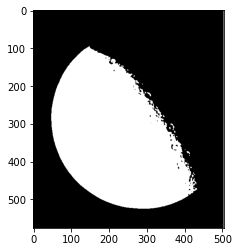

In [46]:
_, img_th = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

plt.imshow(img_th)

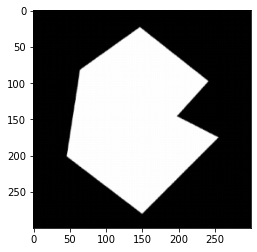

In [47]:
simp_img = cv2.cvtColor( cv2.imread('./simple.png' ), cv2.COLOR_BGR2GRAY)
simp_img = cv2.resize(simp_img, (300, 300))

plt.imshow(simp_img)

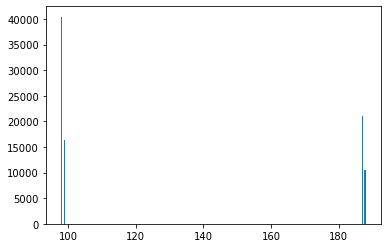

In [48]:
plt.hist(simp_img.ravel(), bins=256);

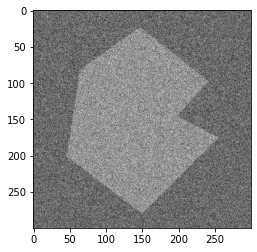

In [49]:
# the role of noise in image thresholding

from scipy import stats

n_rvs = simp_img.shape[0] * simp_img.shape[1]
noise = stats.norm(loc=0, scale=50).rvs(n_rvs).reshape(*simp_img.shape)

simp_img_noise = simp_img + noise
plt.imshow(simp_img_noise)

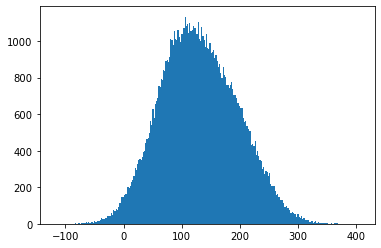

In [50]:
plt.hist(simp_img_noise.ravel(), bins=256);

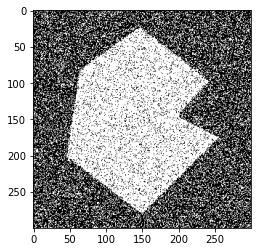

In [51]:
plt.imshow(cv2.threshold(simp_img_noise, 127, 255, cv2.THRESH_BINARY)[1])

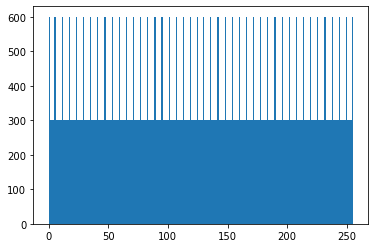

In [52]:
# the role of illumination and reflectance in image thresholding

def gen_grad_img_2d(size, direc):
    if direc == 'horiz':
        row = np.linspace(0, 255, size)
        res = np.tile(row, (size, 1))
    elif direc == 'vertic':
        col = np.linspace(0, 255, size).reshape(size, 1)
        res = np.tile(col, (1, size))

    return res

illum_img = gen_grad_img_2d(simp_img.shape[0], 'horiz')
plt.hist(illum_img.ravel(), bins=256);

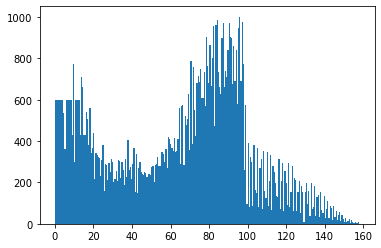

In [53]:
from sklearn.preprocessing import MinMaxScaler

simp_img_ill = simp_img * illum_img
simp_img_ill_norm = simp_img_ill / 255

plt.hist(simp_img_ill_norm.ravel(), bins=256);

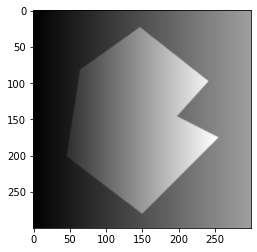

In [54]:
plt.imshow(simp_img_ill_norm)

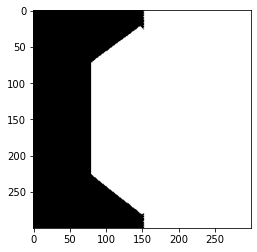

In [55]:
plt.imshow(cv2.threshold(simp_img_ill_norm, 50, 255, cv2.THRESH_BINARY)[1])

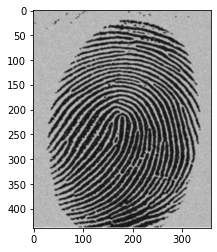

In [56]:
# global thresholding

fp_img = cv2.cvtColor( cv2.imread('./finger_print.png' ), cv2.COLOR_BGR2GRAY)
plt.imshow(fp_img)

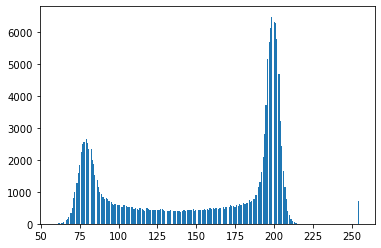

In [57]:
plt.hist(fp_img.ravel(), bins=256);

127.0


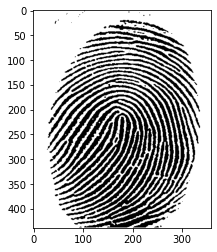

In [58]:
fp_t, fp_img_t = cv2.threshold(fp_img, 127, 255, cv2.THRESH_BINARY)
print(fp_t)

plt.imshow(fp_img_t)

In [59]:
def iterative_thresold(img, delta_t=0.1, patience=5, start_t=None):
    last_t = 0
    t = np.mean(img.ravel()) if not start_t else start_t
    p = 0
    
    while p < patience:
        part_1_idx = img < t
        part_2_idx = img >= t
        
        last_t = t
        mean_1 = np.mean(img[part_1_idx].ravel()) if len(img[part_1_idx]) != 0 else 0
        mean_2 = np.mean(img[part_2_idx].ravel()) if len(img[part_2_idx]) != 0 else 0\
        
        print(t)
        t = (mean_1 + mean_2) / 2
        
        if abs(t - last_t) < delta_t:
            p += 1
            
    return t
    
    
t_val = iterative_thresold(fp_img)

153.28559066440997
145.82708525624952
143.60749459725506
143.0423247213311
143.0423247213311
143.0423247213311
143.0423247213311
143.0423247213311


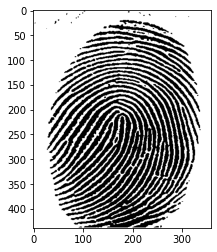

In [60]:
plt.imshow(cv2.threshold(fp_img, t_val, 255, cv2.THRESH_BINARY)[1])

142.0


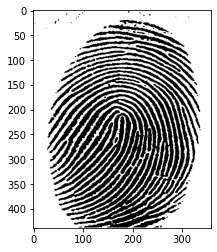

In [61]:
# otsu method for thresholding

fp_img_otsu_k, fp_img_otsu = cv2.threshold(fp_img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(fp_img_otsu_k)

plt.imshow(fp_img_otsu)

93.0


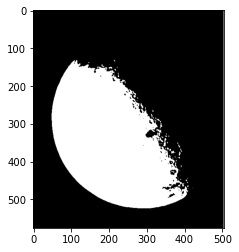

In [62]:
img_otsu_k, img_otsu = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(img_otsu_k)

plt.imshow(img_otsu)

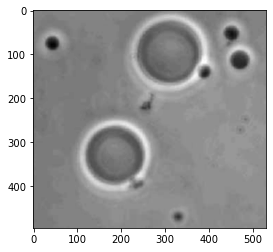

In [63]:
m_img =  cv2.cvtColor( cv2.imread('./molecs.png' ), cv2.COLOR_BGR2GRAY)

plt.imshow(m_img)

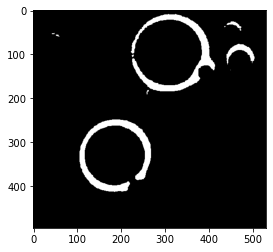

In [64]:
plt.imshow(cv2.threshold(m_img, 200, 255, cv2.THRESH_BINARY)[1])

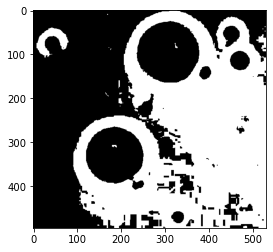

In [65]:
plt.imshow(cv2.threshold(m_img, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1])

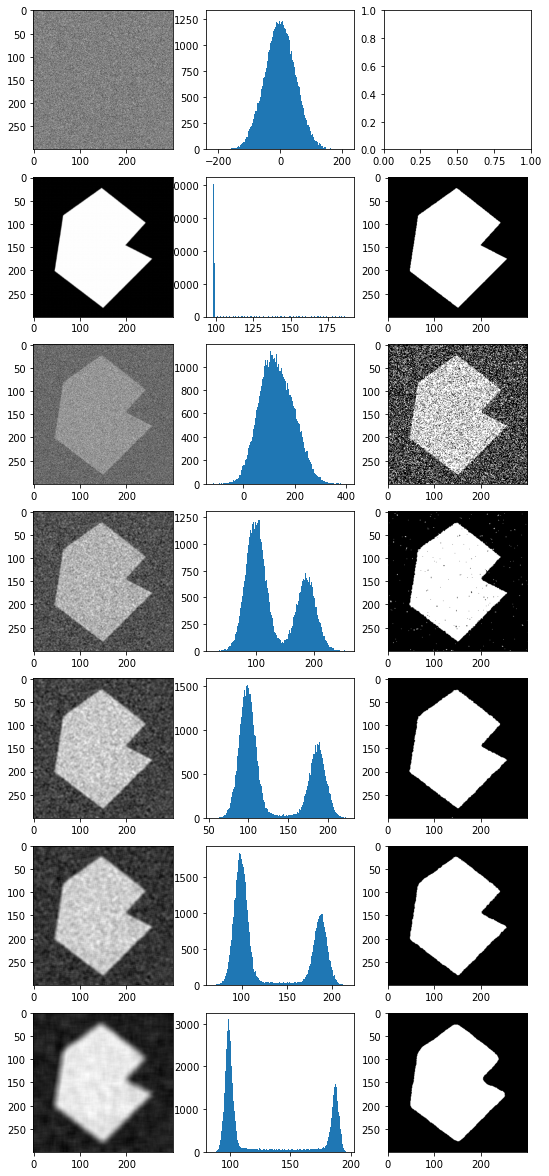

In [66]:
# using image smoothing to improve global thresholding

k_sizes = [(3,3), (5,5), (7,7), (17, 17)]
lap_vars = [5, 7, 9, 51]

fig, ax = plt.subplots(len(k_sizes) +3, 3, figsize=(9, (len(k_sizes) + 3)*3))

ax[0][0].imshow(noise)
ax[0][1].hist(noise.ravel(), bins=256);

ax[1][0].imshow(simp_img)
ax[1][1].hist(simp_img.ravel(), bins=256);
ax[1][2].imshow(cv2.threshold(simp_img.astype(np.uint8), 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1])

ax[2][0].imshow(simp_img_noise)
ax[2][1].hist(simp_img_noise.ravel(), bins=256);
ax[2][2].imshow(cv2.threshold(simp_img_noise.astype(np.uint8), 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1])
    
for i, k_size in enumerate(k_sizes):
    img_blured = cv2.GaussianBlur(simp_img_noise, k_sizes[i], lap_vars[i])
    ax[i+3][0].imshow(img_blured)
    ax[i+3][1].hist(img_blured.ravel(), bins=256);
    ax[i+3][2].imshow(cv2.threshold(img_blured.astype(np.uint8), 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1])

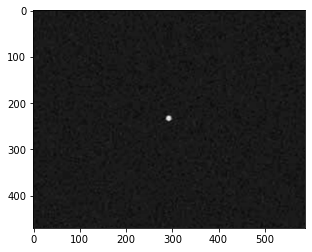

In [67]:
# using edges to improve global thresholding

point_img =  cv2.cvtColor( cv2.imread('./point.png' ), cv2.COLOR_BGR2GRAY)

plt.imshow(point_img)

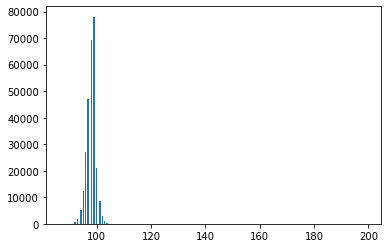

In [68]:
plt.hist(point_img.ravel(), bins=256);

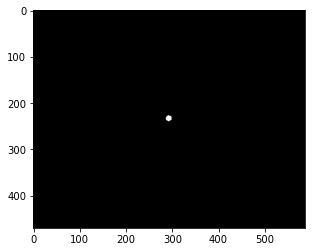

In [69]:
plt.imshow(cv2.threshold(point_img, 127, 255, cv2.THRESH_BINARY)[1])

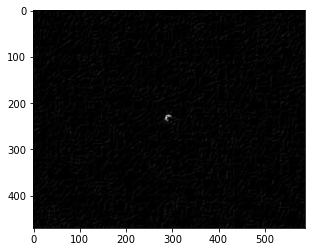

In [70]:
edge_mask = abs(cv2.Sobel(point_img, -1, 1, 0)) + abs(cv2.Sobel(point_img, -1, 0, 1))
plt.imshow(edge_mask)

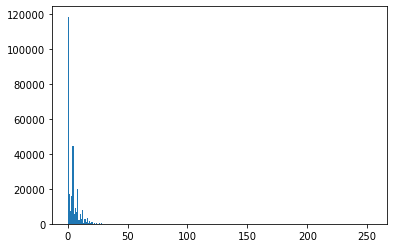

In [71]:
plt.hist(edge_mask.ravel(), bins=256);

In [72]:
edge_mask_otsu_t, _ = cv2.threshold(edge_mask, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

edge_mask_otsu_t

6.0

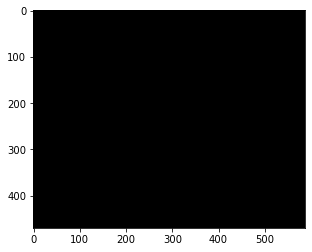

In [73]:
plt.imshow(cv2.threshold(point_img, edge_mask_otsu_t, 255, cv2.THRESH_BINARY)[1])

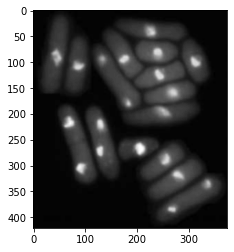

In [74]:
# example 10.16 - using edge info based on the laplacial ...

yeast_img =  cv2.cvtColor( cv2.imread('./yeast.png' ), cv2.COLOR_BGR2GRAY)
plt.imshow(yeast_img)

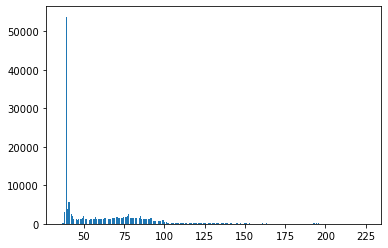

In [75]:
plt.hist(yeast_img.ravel(), bins=256);

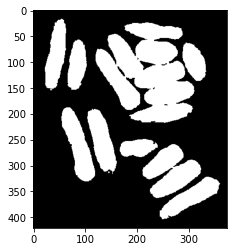

In [76]:
plt.imshow(cv2.threshold(yeast_img, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1])

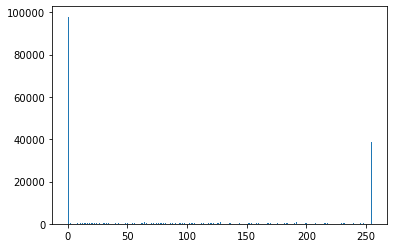

In [77]:
yeast_lap = cv2.Laplacian(yeast_img, -1, ksize=7)

plt.hist(yeast_lap.ravel(), bins=256);

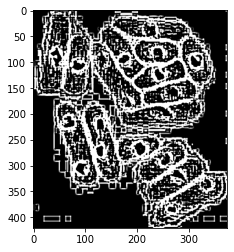

In [78]:
plt.imshow(yeast_lap)

In [79]:
yeast_lap_otsu_t, _ = cv2.threshold(yeast_lap, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
yeast_lap_otsu_t

122.0

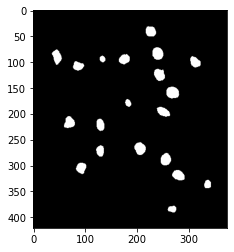

In [80]:
plt.imshow(cv2.threshold(yeast_img, yeast_lap_otsu_t, 255, cv2.THRESH_BINARY)[1])

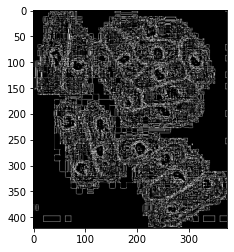

In [81]:
# now multiply edge_mask and the image

yeast_lap_3 = cv2.Laplacian(yeast_img, -1, ksize=3)
yeast_multi = yeast_lap_3 * yeast_img
plt.imshow(yeast_multi)

In [82]:
cv2.threshold

<function threshold>

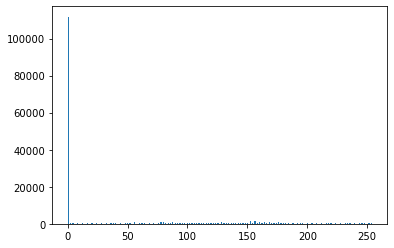

In [83]:
plt.hist(yeast_multi.ravel(), bins=256);

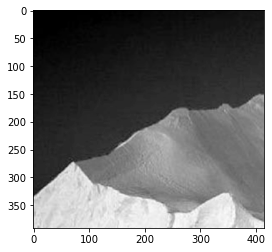

In [84]:
# multiple thresholdss

mount_img = cv2.cvtColor( cv2.imread('./mountain.png' ), cv2.COLOR_BGR2GRAY)
plt.imshow(mount_img)

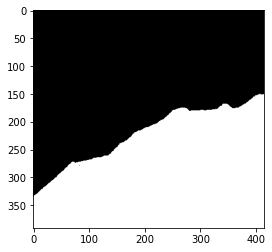

In [85]:
plt.imshow(cv2.threshold(mount_img, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1])

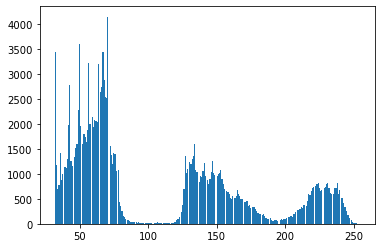

In [86]:
plt.hist(mount_img.ravel(),bins=256);